<a href="https://colab.research.google.com/github/adarsh1chand/Quantum-signal-processing-research/blob/main/Quantum_signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane --quiet

In [ ]:
from typing import List
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [ ]:
device = qml.device("default.qubit", wires = 1)

def signal_rotation_operator_W(a):
    qml.RX(a, wires = 0)


def signal_processing_operator_S(phi):
    qml.RZ(2 * phi, wires = 0)

@qml.qnode(device)
def QSP_circuit(signal_rotation_angle : float, signal_processing_angles : List):

    #signal_rotation_operator_W(signal_rotation_angle)
    for phi in signal_processing_angles[: -1]:
        signal_processing_operator_S(phi)
        signal_rotation_operator_W(signal_rotation_angle)
    if len(signal_processing_angles) > 0:
        signal_processing_operator_S(signal_processing_angles[-1])

    return qml.expval(qml.PauliZ(0))

In [ ]:
signal_rotation_angle = np.random.random() * np.pi / 2
eta = 0.5 * np.arccos(-0.25)
signal_processing_angles = [np.pi / 2, -eta, 2 * eta, 0, -2 * eta, eta]
qml.draw(QSP_circuit)(signal_rotation_angle, signal_processing_angles)

'0: ──RZ(3.14)──RX(1.11)──RZ(-1.82)──RX(1.11)──RZ(3.65)──RX(1.11)──RZ(0.00)──RX(1.11)──RZ(-3.65)\n\n───RX(1.11)──RZ(1.82)─┤  <Z>'

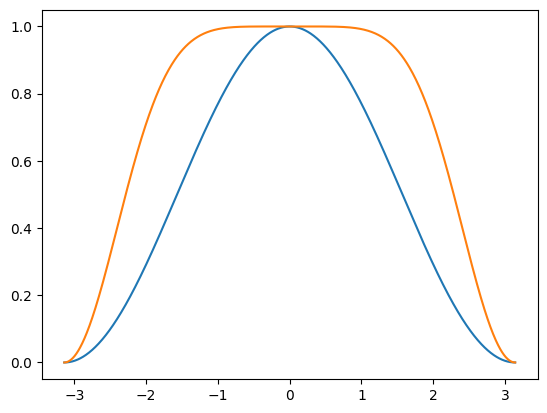

In [ ]:
def plot_QSP_curve(signal_processing_angles):
    rotation_angles = np.linspace(-np.pi, np.pi, 1000)
    probs = []
    for angle in rotation_angles:
      exp = QSP_circuit(angle, signal_processing_angles)
      probs.append((exp.numpy() + 1) / 2)

    plt.plot(rotation_angles, probs)

plot_QSP_curve([0, 0])
plot_QSP_curve(signal_processing_angles)
plt.show()